# 1- Hello Friends

Hello Future Engineers, Nice to meet you!

In this notebook, we will travel to Titanic ship to know who can survive and who can't. So... make your coffee and come back to start coding, I promise, I will be here for you.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings

sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

# 2- Data
We have 3 files:

**df_train**: for training data

**df_test**: for making predictions

**submission**: for saveing our predictions

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [3]:
df_train.head(-10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [4]:
df_test.head(-10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
403,1295,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
406,1298,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S


Let's see our **Features**

In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

I will drop **y** or **output** from **df_train**

In [6]:
X_train = df_train.drop('Survived', axis=1)
y = df_train['Survived']

print('X Train shape:',X_train.shape)
print('y shape:',y.shape)

X Train shape: (891, 11)
y shape: (891,)


Let's merge **train** and **test** data in one DataFrame **"df"**

In [7]:
train_len = len(X_train)
df = pd.concat([X_train, df_test], ignore_index=True)

print('DateFrame Shape:', df.shape)

DateFrame Shape: (1309, 11)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 3- Features
It's time to know more about features.

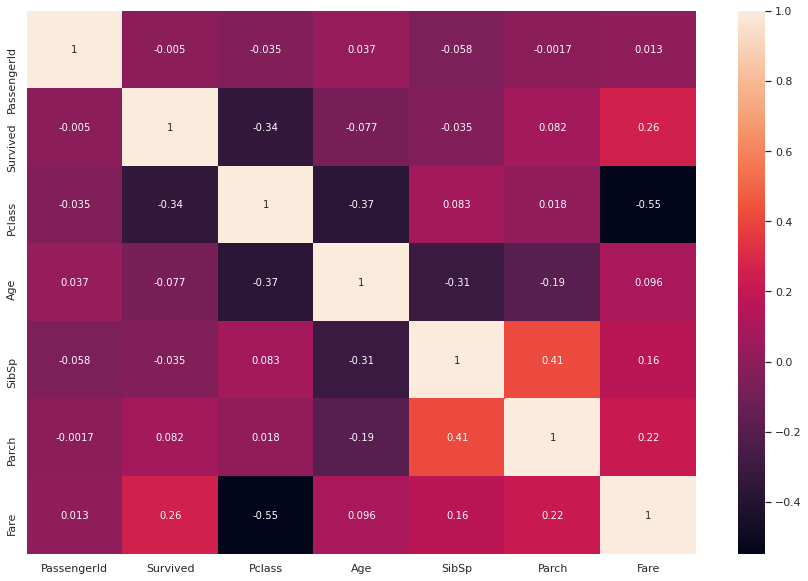

In [10]:
corrmat = df_train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corrmat, annot=True)
plt.show()

Let's know the efficiency of every feature for surviving.
1. Pclass

In [11]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


2. Sex

In [12]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


3. SibSp

In [13]:
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


4. Parch

In [14]:
df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


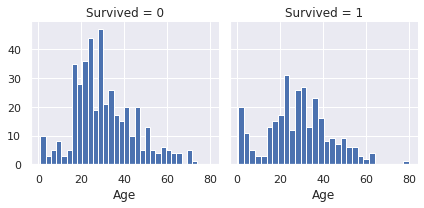

In [15]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=30)
plt.show()

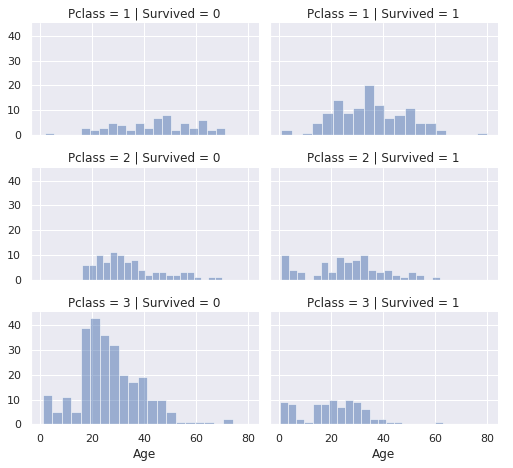

In [16]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

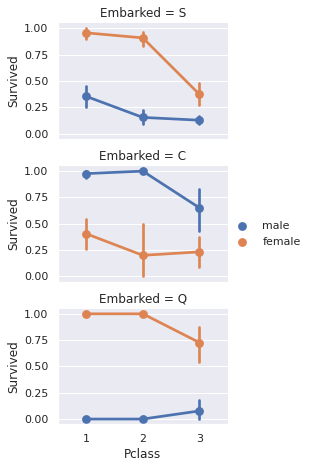

In [17]:
grid = sns.FacetGrid(df_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
plt.show()

# 4- Categorical Data

In [18]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bowerman, Miss. Elsie Edith",male,1601,B96 B98,S
freq,1,577,7,4,644


We Will Extract **Titles** from **Names** before dropping this column.

In [19]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


**Let's Label Encoder**

In [20]:
Encoder = LabelEncoder()
categorical = df.select_dtypes(include=['object'])
for column in categorical:
    df[column] = Encoder.fit_transform(df[column].astype('str'))

df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,155,1,22.0,1,0,720,7.2500,186,2,13
1,2,1,286,0,38.0,1,0,816,71.2833,106,0,14
2,3,3,523,0,26.0,0,0,914,7.9250,186,2,10
3,4,1,422,0,35.0,1,0,65,53.1000,70,2,14
4,5,3,22,1,35.0,0,0,649,8.0500,186,2,13


# 5- Missing Data

In [21]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
Title            0
dtype: int64

In [22]:
print('Before Drop Columns', df.shape)
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
print('After Drop Columns', df.shape)

Before Drop Columns (1309, 12)
After Drop Columns (1309, 8)


I will deal with missing values in **Age** depending on **Sex** and **Pclass** and use **mode**.

In [23]:
Imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for i in range(2):
    for j in range(1,4):
        ls = np.array(df.Age[((df.Sex==i) & (df.Pclass==j))]).reshape(-1,1)
        df.Age[(df.Sex==i) & (df.Pclass==j)] = Imputer.fit_transform(ls)[:,0]
df.Age.isnull().sum()

0

Let's deal with **Fare** and check again

In [24]:
df.Fare =  Imputer.fit_transform(np.array(df.Fare).reshape(-1,1))[:,0]
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

# 6- Are You Reay?

In [25]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,22.0,1,0,7.2500,2,13
1,1,0,38.0,1,0,71.2833,0,14
2,3,0,26.0,0,0,7.9250,2,10
3,1,0,35.0,1,0,53.1000,2,14
4,3,1,35.0,0,0,8.0500,2,13


In [26]:
X_train = df[:train_len]
X_test = df[train_len:]

# 7- Let's Party

In [27]:
RandomForestModel = RandomForestClassifier(n_estimators=700, max_depth=7, max_features=5, n_jobs=-1)

scores = cross_val_score(RandomForestModel, X_train, y, cv=10, n_jobs=-1)
                     
print('Best Test Score:', scores.max())

Best Test Score: 0.9213483146067416


In [28]:
RandomForestModel.fit(X_train, y)
print('Train Score:', RandomForestModel.score(X_train, y))

Train Score: 0.9046015712682379


# 8- Feature Importane

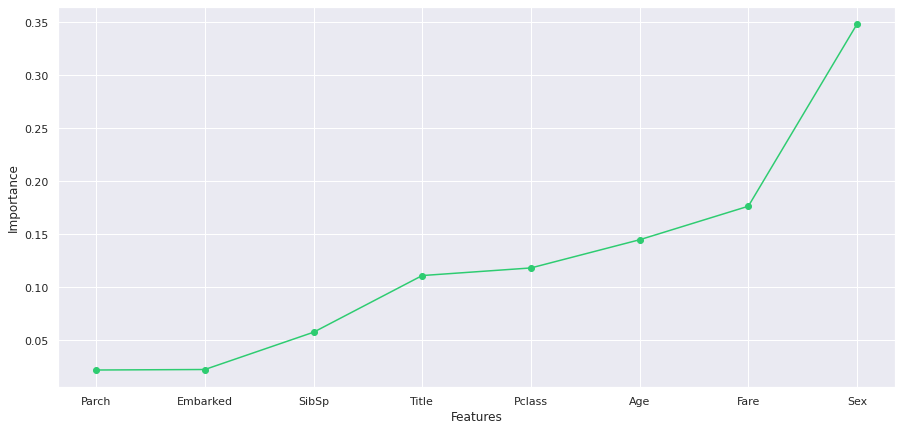

In [29]:
importance = RandomForestModel.feature_importances_
indices = importance.argsort()[-10:]
plt.figure(figsize=(15,7))
plt.plot(X_train.columns[indices], importance[indices], 'o-', color="#2ecc71")
plt.ylabel('Importance'), plt.xlabel('Features')
plt.show()

# 9- Let's Predict

In [30]:
y_pred = RandomForestModel.predict(X_test)

submission['Survived'] = y_pred

submission.to_csv('submission.csv', index=False)